In [233]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [234]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15513229382962711036
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2920035124
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15557740127300457217
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 970, pci bus id: 0000:01:00.0, compute capability: 5.2"
 xla_global_id: 416903419]

# Kaggle Titanic Start

## Data Preprocessing

### 1. Na Data Remove

In [235]:
import pandas as pd
import matplotlib.pyplot as plt

In [236]:
raw_train = pd.read_csv("./datas/titanic/train.csv")
raw_test = pd.read_csv("./datas/titanic/test.csv")
raw_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [237]:
raw_train.isnull().sum() # null 값 확인 Age, Cabin, Embarked 에 null 데이터 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [238]:
# 이상치가 많은 Cabin과 연관성이 떨어져 사용하기 어려운 PassengerId, Name, Ticket 제거
train_removecols = raw_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace=False) 
test_removecols = raw_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace=False) 
train_removecols.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [239]:
train_removeCols_fillAge = train_removecols.fillna({'Age':train_dropCabin['Age'].mean()}) # Age 컬럼 평균값으로 fill
test_removeCols_fillAge = test_removecols.fillna({'Age':train_dropCabin['Age'].mean()})
train_removeCols_fillAge.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [240]:
train_removeCols_fillAge_removeNA = train_removeCols_fillAge.dropna().reset_index(drop = True) # Embarked 2 개의 행 제거
test_removeCols_fillAge_removeNA = test_removeCols_fillAge.dropna().reset_index(drop = True)
train_removeCols_fillAge_removeNA.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [241]:
train_removeCols_fillAge_removeNA.head() # 결과

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### 2. Normalization

In [242]:
import numpy as np

In [243]:
def normalize(value, mean, std):
    return (value-mean)/std

In [244]:
numeric_columns = ['Age', 'Fare']
numeric_df = train_removeCols_fillAge_removeNA[numeric_columns]
desc = numeric_df.describe()

for col in numeric_columns:
    print(desc[col]['mean'], desc[col]['std'])
    for i in range(numeric_df.shape[0]):
        numeric_df[col][i] = normalize(numeric_df[col][i], desc[col]['mean'], desc[col]['std'])                                                                
numeric_df.head()

29.65344637067425 12.96836630925232
32.09668087739032 49.697504316707956


D:\anaconda3\envs\tf2_py37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Fare
0,-0.590163,-0.499958
1,0.643609,0.788503
2,-0.281720,-0.486376
3,0.412277,0.422623
4,0.412277,-0.483861


In [245]:
# test data
t_numeric_df = test_removeCols_fillAge_removeNA[numeric_columns]
t_desc = t_numeric_df.describe()

for col in numeric_columns:
    print(t_desc[col]['mean'], t_desc[col]['std'])
    for i in range(t_numeric_df.shape[0]):
        t_numeric_df[col][i] = normalize(t_numeric_df[col][i], t_desc[col]['mean'], t_desc[col]['std'])                                                                
t_numeric_df.head()

30.081832416419804 12.563849309220934
35.627188489208635 55.907576179973844


D:\anaconda3\envs\tf2_py37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Fare
0,0.351657,-0.497213
1,1.346575,-0.512045
2,2.540477,-0.463974
3,-0.245294,-0.482308
4,-0.643261,-0.417469


### 3. One-Hot Encoding

In [246]:
categorical_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
categorical_df = train_removeCols_fillAge_removeNA[categorical_columns]
categorical_df['Pclass'] = categorical_df['Pclass'].apply(str)
categorical_df['SibSp'] = categorical_df['SibSp'].apply(str)
categorical_df['Parch'] = categorical_df['Parch'].apply(str)
categorical_df = pd.get_dummies(categorical_df)
categorical_df.head()

D:\anaconda3\envs\tf2_py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda3\envs\tf2_py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\anaconda3\envs\tf2_py37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [247]:
t_categorical_df = test_removeCols_fillAge_removeNA[categorical_columns]
t_categorical_df['Pclass'] = t_categorical_df['Pclass'].apply(str)
t_categorical_df['SibSp'] = t_categorical_df['SibSp'].apply(str)
t_categorical_df['Parch'] = t_categorical_df['Parch'].apply(str)
t_categorical_df = pd.get_dummies(t_categorical_df)
t_categorical_df.head()

D:\anaconda3\envs\tf2_py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda3\envs\tf2_py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda3\envs\tf2_py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [248]:
real_train_df = pd.concat([numeric_df,categorical_df], axis=1)
real_test_df = pd.concat([t_numeric_df,t_categorical_df], axis=1)
real_train_df

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,-0.590163,-0.499958,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0.643609,0.788503,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,-0.281720,-0.486376,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.412277,0.422623,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0.412277,-0.483861,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.204609,-0.384258,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
885,-0.821495,-0.042189,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
886,0.003522,-0.173986,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
887,-0.281720,-0.042189,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [249]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])

In [250]:
train_removeCols_fillAge_removeNA['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64

In [251]:
test_removeCols_fillAge_removeNA.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [252]:
x_train = real_train_df.values
y_train = train_removeCols_fillAge_removeNA['Survived'].values

shuffle_index = np.arange(x_train.shape[0])
np.random.shuffle(shuffle_index)

x_train = x_train[shuffle_index]
y_train = y_train[shuffle_index]

In [253]:
x_val = x_train[int(x_train.shape[0]*0.8):]
x_train = x_train[:int(x_train.shape[0]*0.8)]
y_val = y_train[int(y_train.shape[0]*0.8):]
y_train = y_train[:int(y_train.shape[0]*0.8)]

In [254]:
x_val.shape, x_train.shape, y_val.shape, y_train.shape

((178, 24), (711, 24), (178,), (711,))

In [255]:
hist = model.fit(
        x=x_train,
        y=y_train,
        batch_size=5,
        epochs=1000,
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)])

print(hist.history)

Epoch 1/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.5270 - accuracy: 0.7187
Epoch 2/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.4540 - accuracy: 0.7932
Epoch 3/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.4297 - accuracy: 0.8073
Epoch 4/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.4185 - accuracy: 0.8087
Epoch 5/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.4129 - accuracy: 0.8186
Epoch 6/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.4158 - accuracy: 0.8186
Epoch 7/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.4000 - accuracy: 0.8214
Epoch 8/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.3913 - accuracy: 0.8284
Epoch 9/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.3833 - accuracy: 0.8326
Epoch 10/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.381

143/143 [==============================] - 1s 4ms/step - loss: 0.2665 - accuracy: 0.8847
Epoch 81/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.2694 - accuracy: 0.8833
Epoch 82/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.2645 - accuracy: 0.8847
Epoch 83/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.2647 - accuracy: 0.8861
Epoch 84/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.2604 - accuracy: 0.8847
Epoch 85/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.2606 - accuracy: 0.8917
Epoch 86/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.2613 - accuracy: 0.8819
Epoch 87/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.2639 - accuracy: 0.8833
Epoch 88/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.2640 - accuracy: 0.8903
Epoch 89/1000
143/143 [==============================] - 1s 4ms/step - loss: 0.2601 - a

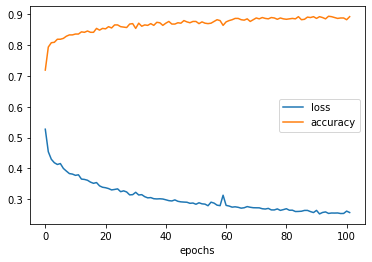

In [261]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['accuracy'], label='accuracy')
plt.legend()

plt.xlabel('epochs')
plt.show()

In [262]:
y_pred = model.predict(x_val).reshape(x_val.shape[0])
y_pred = np.where(y_pred>0.5, 1, 0)
answering = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_val[i]:
        answering+=1
accuracy = answering/len(y_val)
print("Accuracy",accuracy)

Accuracy 0.7808988764044944
